## DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('California Housing Data.csv')
#data.info()

In [3]:
data.head()

,Unnamed: 0,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude,medianHouseValue
0,0,41.0,6.984127,1.023810,322.0,2.555556,8.3252,37.88,-122.23,4.526
1,1,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,37.86,-122.22,3.585
2,2,52.0,8.288136,1.073446,496.0,2.802260,7.2574,37.85,-122.24,3.521
3,3,52.0,5.817352,1.073059,558.0,2.547945,5.6431,37.85,-122.25,3.413
4,4,52.0,6.281853,1.081081,565.0,2.181467,3.8462,37.85,-122.25,3.422


In [4]:
data.head().describe()

,Unnamed: 0,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude,medianHouseValue
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.000000,43.600000,6.721921,1.044655,868.400000,2.439414,6.674660,37.858000,-122.238000,3.693400
std,1.581139,13.501852,0.970532,0.046619,862.336535,0.288132,1.921878,0.013038,0.013038,0.470897
min,0.000000,21.000000,5.817352,0.971880,322.000000,2.109842,3.846200,37.850000,-122.250000,3.413000
25%,1.000000,41.000000,6.238137,1.023810,496.000000,2.181467,5.643100,37.850000,-122.250000,3.422000
50%,2.000000,52.000000,6.281853,1.073059,558.000000,2.547945,7.257400,37.850000,-122.240000,3.521000
75%,3.000000,52.000000,6.984127,1.073446,565.000000,2.555556,8.301400,37.860000,-122.230000,3.585000
max,4.000000,52.000000,8.288136,1.081081,2401.000000,2.802260,8.325200,37.880000,-122.220000,4.526000


In [5]:

data = data.dropna(axis=0)
data

,Unnamed: 0,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude,medianHouseValue
0,0,41.0,6.984127,1.023810,322.0,2.555556,8.3252,37.88,-122.23,4.526
1,1,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,37.86,-122.22,3.585
2,2,52.0,8.288136,1.073446,496.0,2.802260,7.2574,37.85,-122.24,3.521
3,3,52.0,5.817352,1.073059,558.0,2.547945,5.6431,37.85,-122.25,3.413
4,4,52.0,6.281853,1.081081,565.0,2.181467,3.8462,37.85,-122.25,3.422
5,5,52.0,4.761658,1.103627,413.0,2.139896,4.0368,37.85,-122.25,2.697
6,6,52.0,4.931907,0.951362,1094.0,2.128405,3.6591,37.84,-122.25,2.992
7,7,52.0,4.797527,1.061824,1157.0,1.788253,3.1200,37.84,-122.25,2.414
8,8,42.0,4.294118,1.117647,1206.0,2.026891,2.0804,37.84,-122.26,2.267
9,9,52.0,4.970588,0.990196,1551.0,2.172269,3.6912,37.84,-122.25,2.611


In [6]:
x_data = data.drop(data.columns[[0]], axis = 1)
x_data = x_data.drop(x_data.columns[[8]], axis =1)
y_data = data['medianHouseValue']

In [7]:
x_data

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,8.3252,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,7.2574,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,5.6431,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,3.8462,37.85,-122.25
5,52.0,4.761658,1.103627,413.0,2.139896,4.0368,37.85,-122.25
6,52.0,4.931907,0.951362,1094.0,2.128405,3.6591,37.84,-122.25
7,52.0,4.797527,1.061824,1157.0,1.788253,3.1200,37.84,-122.25
8,42.0,4.294118,1.117647,1206.0,2.026891,2.0804,37.84,-122.26
9,52.0,4.970588,0.990196,1551.0,2.172269,3.6912,37.84,-122.25


In [8]:
%matplotlib inline  

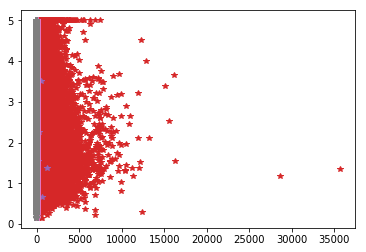

In [9]:
plt.plot(x_data, y_data, '*')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=101)


In [11]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
x_train = pd.DataFrame(data = scaler.transform(x_train), columns = x_train.columns, index= x_train.index)
x_test = pd.DataFrame(data = scaler.transform(x_test), columns = x_test.columns, index= x_test.index)

In [13]:
data.columns

Index(['Unnamed: 0', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'MedInc', 'Latitude', 'Longitude', 'medianHouseValue'],
      dtype='object')

In [14]:

age = tf.feature_column.numeric_column('HouseAge')
rooms = tf.feature_column.numeric_column('AveRooms')
bedroom = tf.feature_column.numeric_column('AveBedrms')
population = tf.feature_column.numeric_column('Population')
households = tf.feature_column.numeric_column('AveOccup')
income = tf.feature_column.numeric_column('MedInc')
longitude = tf.feature_column.numeric_column('Longitude')
latitude = tf.feature_column.numeric_column('Latitude')
#medianvalue = tf.feature_column.numeric_column('medianHouseValue')


In [15]:
feat_cols = [age, rooms, bedroom, population, households, income, longitude, latitude]

In [16]:
feat_cols

[_NumericColumn(key='HouseAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveBedrms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveOccup', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='MedInc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [17]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 20, num_epochs = 2000, shuffle = True)

In [18]:
model = tf.estimator.DNNRegressor(hidden_units = [8, 8, 8, 8, 8], feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Julia\\AppData\\Local\\Temp\\tmpj_w14xkz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000268A4527160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:

model.train(input_fn = input_func, steps = 50000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Julia\AppData\Local\Temp\tmpj_w14xkz\model.ckpt.
INFO:tensorflow:loss = 161.16513, step = 1
INFO:tensorflow:global_step/sec: 196.045
INFO:tensorflow:loss = 16.099266, step = 101 (0.518 sec)
INFO:tensorflow:global_step/sec: 257.6
INFO:tensorflow:loss = 23.088781, step = 201 (0.388 sec)
INFO:tensorflow:global_step/sec: 265.987
INFO:tensorflow:loss = 9.485705, step = 301 (0.372 sec)
INFO:tensorflow:global_step/sec: 336.913
INFO:tensorflow:loss = 13.675078, step = 401 (0.293 sec)
INFO:tensorflow:global_step/sec: 268.962
INFO:tensorflow:loss = 4.1113653, step = 501 (0.384 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:loss = 13.719406, step = 601 (0.383 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 6.615873, step = 8001 (0.319 sec)
INFO:tensorflow:global_step/sec: 303.271
INFO:tensorflow:loss = 3.0961561, step = 8101 (0.345 sec)
INFO:tensorflow:global_step/sec: 305.531
INFO:tensorflow:loss = 3.9268777, step = 8201 (0.327 sec)
INFO:tensorflow:global_step/sec: 296.423
INFO:tensorflow:loss = 7.1081624, step = 8301 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.258
INFO:tensorflow:loss = 9.17853, step = 8401 (0.330 sec)
INFO:tensorflow:global_step/sec: 298.241
INFO:tensorflow:loss = 7.625117, step = 8501 (0.351 sec)
INFO:tensorflow:global_step/sec: 287.557
INFO:tensorflow:loss = 3.5242224, step = 8601 (0.332 sec)
INFO:tensorflow:global_step/sec: 297.81
INFO:tensorflow:loss = 8.24651, step = 8701 (0.336 sec)
INFO:tensorflow:global_step/sec: 301.421
INFO:tensorflow:loss = 21.544264, step = 8801 (0.347 sec)
INFO:tensorflow:global_step/sec: 287.503
INFO:tensorflow:loss = 6.454126, step = 8901 (0.348 sec)
INFO:tensorflow:global_step/sec: 278.961
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 296.615
INFO:tensorflow:loss = 6.2630134, step = 16301 (0.340 sec)
INFO:tensorflow:global_step/sec: 293
INFO:tensorflow:loss = 13.077652, step = 16401 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.049
INFO:tensorflow:loss = 3.9139235, step = 16501 (0.344 sec)
INFO:tensorflow:global_step/sec: 293.804
INFO:tensorflow:loss = 5.01473, step = 16601 (0.340 sec)
INFO:tensorflow:global_step/sec: 283.908
INFO:tensorflow:loss = 6.491447, step = 16701 (0.337 sec)
INFO:tensorflow:global_step/sec: 287.481
INFO:tensorflow:loss = 8.993181, step = 16801 (0.348 sec)
INFO:tensorflow:global_step/sec: 280.655
INFO:tensorflow:loss = 8.990877, step = 16901 (0.356 sec)
INFO:tensorflow:global_step/sec: 279.655
INFO:tensorflow:loss = 4.6611767, step = 17001 (0.358 sec)
INFO:tensorflow:global_step/sec: 284.989
INFO:tensorflow:loss = 5.808239, step = 17101 (0.351 sec)
INFO:tensorflow:global_step/sec: 298.987
INFO:tensorflow:loss = 6.3918467, step = 17201 (0.334 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 251.676
INFO:tensorflow:loss = 5.9484453, step = 24601 (0.386 sec)
INFO:tensorflow:global_step/sec: 291.262
INFO:tensorflow:loss = 3.9225497, step = 24701 (0.355 sec)
INFO:tensorflow:global_step/sec: 271.284
INFO:tensorflow:loss = 9.181651, step = 24801 (0.353 sec)
INFO:tensorflow:global_step/sec: 278.442
INFO:tensorflow:loss = 3.900625, step = 24901 (0.368 sec)
INFO:tensorflow:global_step/sec: 279.95
INFO:tensorflow:loss = 11.0789795, step = 25001 (0.349 sec)
INFO:tensorflow:global_step/sec: 290.363
INFO:tensorflow:loss = 7.800338, step = 25101 (0.357 sec)
INFO:tensorflow:global_step/sec: 305.258
INFO:tensorflow:loss = 6.838468, step = 25201 (0.315 sec)
INFO:tensorflow:global_step/sec: 273.005
INFO:tensorflow:loss = 13.609591, step = 25301 (0.366 sec)
INFO:tensorflow:global_step/sec: 290.04
INFO:tensorflow:loss = 6.9397135, step = 25401 (0.345 sec)
INFO:tensorflow:global_step/sec: 307.596
INFO:tensorflow:loss = 8.993862, step = 25501 (0.341 sec)
INFO:t

INFO:tensorflow:loss = 7.8401394, step = 32801 (0.365 sec)
INFO:tensorflow:global_step/sec: 258.927
INFO:tensorflow:loss = 5.0009904, step = 32901 (0.381 sec)
INFO:tensorflow:global_step/sec: 272.447
INFO:tensorflow:loss = 7.7134995, step = 33001 (0.370 sec)
INFO:tensorflow:global_step/sec: 302.227
INFO:tensorflow:loss = 5.344224, step = 33101 (0.334 sec)
INFO:tensorflow:global_step/sec: 296.23
INFO:tensorflow:loss = 11.307842, step = 33201 (0.334 sec)
INFO:tensorflow:global_step/sec: 298.393
INFO:tensorflow:loss = 7.237918, step = 33301 (0.338 sec)
INFO:tensorflow:global_step/sec: 290.436
INFO:tensorflow:loss = 3.7688293, step = 33401 (0.342 sec)
INFO:tensorflow:global_step/sec: 297.578
INFO:tensorflow:loss = 13.027065, step = 33501 (0.337 sec)
INFO:tensorflow:global_step/sec: 294.816
INFO:tensorflow:loss = 4.336385, step = 33601 (0.334 sec)
INFO:tensorflow:global_step/sec: 301.917
INFO:tensorflow:loss = 2.6940482, step = 33701 (0.331 sec)
INFO:tensorflow:global_step/sec: 317.02
INFO:

INFO:tensorflow:global_step/sec: 307.304
INFO:tensorflow:loss = 4.8052144, step = 41101 (0.341 sec)
INFO:tensorflow:global_step/sec: 290.562
INFO:tensorflow:loss = 3.3858266, step = 41201 (0.329 sec)
INFO:tensorflow:global_step/sec: 300.837
INFO:tensorflow:loss = 11.200847, step = 41301 (0.348 sec)
INFO:tensorflow:global_step/sec: 279.118
INFO:tensorflow:loss = 12.573587, step = 41401 (0.343 sec)
INFO:tensorflow:global_step/sec: 304.552
INFO:tensorflow:loss = 5.130903, step = 41501 (0.344 sec)
INFO:tensorflow:global_step/sec: 293.291
INFO:tensorflow:loss = 1.5202099, step = 41601 (0.341 sec)
INFO:tensorflow:global_step/sec: 300.972
INFO:tensorflow:loss = 10.31609, step = 41701 (0.317 sec)
INFO:tensorflow:global_step/sec: 304.569
INFO:tensorflow:loss = 9.89062, step = 41801 (0.344 sec)
INFO:tensorflow:global_step/sec: 290.726
INFO:tensorflow:loss = 2.930834, step = 41901 (0.344 sec)
INFO:tensorflow:global_step/sec: 288.882
INFO:tensorflow:loss = 5.1209397, step = 42001 (0.331 sec)
INFO:

INFO:tensorflow:loss = 7.7884016, step = 49301 (0.361 sec)
INFO:tensorflow:global_step/sec: 283.689
INFO:tensorflow:loss = 5.1107907, step = 49401 (0.337 sec)
INFO:tensorflow:global_step/sec: 304.549
INFO:tensorflow:loss = 6.2660165, step = 49501 (0.344 sec)
INFO:tensorflow:global_step/sec: 282.642
INFO:tensorflow:loss = 2.9420905, step = 49601 (0.354 sec)
INFO:tensorflow:global_step/sec: 298.212
INFO:tensorflow:loss = 4.6702867, step = 49701 (0.319 sec)
INFO:tensorflow:global_step/sec: 286.618
INFO:tensorflow:loss = 2.0914376, step = 49801 (0.349 sec)
INFO:tensorflow:global_step/sec: 282.405
INFO:tensorflow:loss = 22.897491, step = 49901 (0.354 sec)
INFO:tensorflow:Saving checkpoints for 50000 into C:\Users\Julia\AppData\Local\Temp\tmpj_w14xkz\model.ckpt.
INFO:tensorflow:Loss for final step: 9.60741.


In [20]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size = 20, num_epochs = 1, shuffle = False)

In [21]:
pred_gen = model.predict(predict_input_func)

In [22]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Julia\AppData\Local\Temp\tmpj_w14xkz\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [23]:

predictions

[{'predictions': array([3.6749437], dtype=float32)},
 {'predictions': array([5.104504], dtype=float32)},
 {'predictions': array([1.1972427], dtype=float32)},
 {'predictions': array([2.044076], dtype=float32)},
 {'predictions': array([4.5935073], dtype=float32)},
 {'predictions': array([1.0183973], dtype=float32)},
 {'predictions': array([2.3089244], dtype=float32)},
 {'predictions': array([1.8788159], dtype=float32)},
 {'predictions': array([2.5947788], dtype=float32)},
 {'predictions': array([2.3213623], dtype=float32)},
 {'predictions': array([2.7656806], dtype=float32)},
 {'predictions': array([2.2968922], dtype=float32)},
 {'predictions': array([0.9502639], dtype=float32)},
 {'predictions': array([1.9065256], dtype=float32)},
 {'predictions': array([4.25287], dtype=float32)},
 {'predictions': array([1.2848713], dtype=float32)},
 {'predictions': array([1.4696126], dtype=float32)},
 {'predictions': array([2.5009887], dtype=float32)},
 {'predictions': array([2.104557], dtype=float32)}

In [24]:
final_y_preds = []

for pred in predictions:
    final_y_preds.append(pred['predictions'])

In [25]:

final_y_preds

[array([3.6749437], dtype=float32),
 array([5.104504], dtype=float32),
 array([1.1972427], dtype=float32),
 array([2.044076], dtype=float32),
 array([4.5935073], dtype=float32),
 array([1.0183973], dtype=float32),
 array([2.3089244], dtype=float32),
 array([1.8788159], dtype=float32),
 array([2.5947788], dtype=float32),
 array([2.3213623], dtype=float32),
 array([2.7656806], dtype=float32),
 array([2.2968922], dtype=float32),
 array([0.9502639], dtype=float32),
 array([1.9065256], dtype=float32),
 array([4.25287], dtype=float32),
 array([1.2848713], dtype=float32),
 array([1.4696126], dtype=float32),
 array([2.5009887], dtype=float32),
 array([2.104557], dtype=float32),
 array([4.2808266], dtype=float32),
 array([1.7051508], dtype=float32),
 array([2.7273207], dtype=float32),
 array([2.457409], dtype=float32),
 array([1.7365468], dtype=float32),
 array([1.9643312], dtype=float32),
 array([4.841967], dtype=float32),
 array([1.3050137], dtype=float32),
 array([0.94667727], dtype=float32)

In [26]:
mse = mean_squared_error(y_test, final_y_preds) ** 0.5
mse

0.6274658019217527

In [27]:
import math
rmse = math.sqrt(mse)
rmse

0.7921273899580501

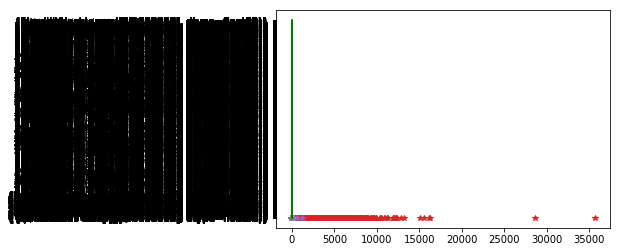

In [28]:
plt.plot(x_data, y_data, '*')
plt.plot(x_test, predictions, 'g')